# Analizar el comportamiento de los clientes y determinar qué plan de prepago es más rentable

Realizaremos un análisis para el operador de telecomunicaciones Megaline. La empresa ofrece a sus clientes dos planes tarifarios de prepago, Surf y Ultimate. El departamento comercial quiere saber cuál de los planes aporta más ingresos para ajustar el presupuesto de publicidad. Estudiaremos los datos para analizar el comportamiento de los clientes

In [3]:
from scipy import stats as st
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

Cargar datos

In [4]:
# Carga el archivo de datos en un DataFrame
calls = pd.read_csv("C:/Users/USER/Documents/proyectos/proyecto 4(terminado)/megaline_calls.csv")
internet = pd.read_csv("C:/Users/USER/Documents/proyectos/proyecto 4(terminado)/megaline_internet.csv")
messages = pd.read_csv("C:/Users/USER/Documents/proyectos/proyecto 4(terminado)/megaline_messages.csv")
plans = pd.read_csv("C:/Users/USER/Documents/proyectos/proyecto 4(terminado)/megaline_plans.csv")
users = pd.read_csv("C:/Users/USER/Documents/proyectos/proyecto 4(terminado)/megaline_users.csv")

Exploración de datos
---

El datasets calls continene los siguientes campos:

- `id` — identificador único de la llamada
- `call_date` — fecha de la llamada
- `duration` — duración de la llamada (en minutos)
- `user_id` — el identificador del usuario que realiza la llamada

El dataframe **"llamadas"** contiene información sobre las llamadas realizadas por cada usuario

In [5]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


Aqui podemos ver que tendremos que cambiar la columna **"call_time"** en datetime y redondearemos la duración

In [6]:
calls.head()

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22


---

El datasets internet continene los siguientes campos:

- `id` — identificador único de la sesión
- `mb_used` — el volumen de datos gastados durante la sesión (en megabytes)
- `session_date` — fecha de la sesión web
- `user_id` — identificador del usuario

El dataframe **"internet"** contiene información sobre el cantidad de datos consumidos por cada usuario.

In [7]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


Tenemos que convertir los valores de la columna 'session_date' en tipo datetime y también convertir los valores de 'mb_used' en Gigabytes y redondearlos.

In [8]:
internet.head()

,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22


---

El datasets messages continene los siguientes campos:

- `id` — identificador único del SMS
- `message_date` — fecha del SMS
- `user_id` — el identificador del usuario que manda el SMS

El dataframe **"messages"** almacena información sobre los mensajes enviados por cada usuario de Megaline.

In [9]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


Tenemos que convertir la columna **"message_date"** necesitan ser convertidos a tipo datetime

In [10]:
messages.head()

,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26


---

El datasets plans continene los siguientes campos:

- `plan_name` — nombre de la tarifa
- `usd_monthly_fee` — pago mensual en dólares estadounidenses
- `minutes_included` — minutos incluidos al mes
- `messages_included` — SMS incluidos al mes
- `mb_per_month_included` — datos incluidos al mes (en megabytes)
- `usd_per_minute` — precio por minuto tras exceder los límites del paquete (por ejemplo, si el paquete incluye 100 minutos el operador cobrará el minuto 101)
- `usd_per_message` — precio por SMS tras exceder los límites del paquete
- `usd_per_gb` — precio por gigabyte de los datos extra tras exceder los límites del paquete (1 GB = 1024 megabytes)

El dataframe **"plans"** almacena información sobre los planes ofrecidos por la compañia Megaline.

In [11]:
plans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


In [12]:
plans.head()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


---

El datasets users continene los siguientes campos:

- `user_id` — identificador único del usuario
- `first_name` — nombre del usuario
- `last_name` — apellido del usuario
- `age` — edad del usuario (en años)
- `reg_date` — fecha de suscripción (dd, mm, aa)
- `churn_date` — la fecha en que el usuario dejó de usar el servicio (si el valor es ausente, la tarifa se estaba usando cuando se recuperaron estos datos)
- `city` — ciudad de residencia del usuario
- `plan` — nombre de la tarifa

EL dataframe **"users"** contiene informacion sobre los usuarios.

In [13]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [14]:
users.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN


- **conclusión**

Hemos analisado los dataframe de datos que nos han proporcionado y hemos detectado algunos problemas problemas que deben resolverse antes de proceder a un analisis.

---

### **Procesamiento de datos**

### Dataframe **calls**
- En primer lugar, redondearemos los valores de la columna **"duration"**. utilizaremos el método 'np.ceil'

In [15]:
#el método np.ceil para redondear sus valores y luego los conviertimos a "int"  enteros
calls['duration'] = calls['duration'].apply(np.ceil).astype('int')

#esto convierte los valores 'call_date' a tipo datetime utilizando el formato "%Y-%m-%d"
calls['call_date'] = pd.to_datetime(calls['call_date'], format='%Y-%m-%d')

#mostraremos info general para ver los cambios efectuados
calls.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         137735 non-null  object        
 1   user_id    137735 non-null  int64         
 2   call_date  137735 non-null  datetime64[ns]
 3   duration   137735 non-null  int32         
dtypes: datetime64[ns](1), int32(1), int64(1), object(1)
memory usage: 3.7+ MB


Añadiremos ahora unas columnas que nos indique el dia nombre del dia, mes y el año en que se realizó cada llamada. Podemos extraer el nombre del mes de la fecha utilizando el método dt.day_name(), "dt.month_name()", "dt.year". Llamaremos a nuestras nuevas columnas "weekday", "month", "year".

In [16]:
#extrae el nombre del mes de la columna call_date y lo guarda en nuestra nueva columna "month"
calls['month'] = calls['call_date'].dt.month_name()


In [17]:
calls.head()

,id,user_id,call_date,duration,month
0,1000_93,1000,2018-12-27,9,December
1,1000_145,1000,2018-12-27,14,December
2,1000_247,1000,2018-12-27,15,December
3,1000_309,1000,2018-12-28,6,December
4,1000_380,1000,2018-12-30,5,December


---

### Dataframe **internet**:

- En primer lugar, convirtamos los valores de la columna 'mb_used' de megabytes a gigabytes (1GB = 1024MB).
- A continuación, podemos redondear esos valores con el metodo **np.ceil** y cambiar el nombre de la columna con el metodo **.rename()**.

In [18]:
#dividimos los valores de la columna "mb_used" entre 1024 para convertirlos en Gigabytes
internet['mb_used'] = internet['mb_used']/1024

#redondeamos los valores y los convierte en enteros
internet['mb_used'] = internet['mb_used'].apply(np.ceil).astype('int')

#renombramos el nombre de la columna de mb_used a gb_used con el metodo .rename()
internet = internet.rename(columns={'mb_used': 'gb_used'})


internet.info(verbose=True) #displays general information after the changes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            104825 non-null  object
 1   user_id       104825 non-null  int64 
 2   session_date  104825 non-null  object
 3   gb_used       104825 non-null  int32 
dtypes: int32(1), int64(1), object(2)
memory usage: 2.8+ MB


Vamos a convertir la columna 'session_date' a tipo datetime. El mismo ejercicio que anterior con el método 'pd.to_datetime' con el parámetro format='%Y-%m-%d'.

In [19]:
internet['session_date'] = pd.to_datetime(internet['session_date'], format='%Y-%m-%d')
internet.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            104825 non-null  object        
 1   user_id       104825 non-null  int64         
 2   session_date  104825 non-null  datetime64[ns]
 3   gb_used       104825 non-null  int32         
dtypes: datetime64[ns](1), int32(1), int64(1), object(1)
memory usage: 2.8+ MB


Crearemos una columna llamada **"month"** que extraiga el nombre del mes de la columna **"session_date"**.

In [20]:
#extrae el nombre del mes de la columna call_date y lo guarda en nuestra nueva columna "month"
internet['month'] = internet['session_date'].dt.month_name()

In [21]:
internet.head()

,id,user_id,session_date,gb_used,month
0,1000_13,1000,2018-12-29,1,December
1,1000_204,1000,2018-12-31,0,December
2,1000_379,1000,2018-12-28,1,December
3,1000_413,1000,2018-12-26,1,December
4,1000_442,1000,2018-12-27,1,December


---

### Datadrame **messages**:

En primer lugar, convertiremos los valores de la columna 'message_date' a tipo datatime. como anteriormente hemos hecho

In [22]:
messages['message_date'] = pd.to_datetime(messages['message_date'], format='%Y-%m-%d')
#converts message_date values to date-time type with the appropriate format

messages.info(verbose=True) #general info after changes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            76051 non-null  object        
 1   user_id       76051 non-null  int64         
 2   message_date  76051 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.7+ MB


Crearemos columnas que nos indique el dia nombre del dia, mes y el año en que se realizó cada mensaje. De la columna message_date utilizando el método dt.day_name(), "dt.month_name()", "dt.year". Llamaremos a nuestras nuevas columnas "weekday", "month", "year".

In [23]:
#extrae el nombre del mes de la columna call_date y lo guarda en nuestra nueva columna "month"
messages['month'] = messages['message_date'].dt.month_name()

In [24]:
messages.head()

,id,user_id,message_date,month
0,1000_125,1000,2018-12-27,December
1,1000_160,1000,2018-12-31,December
2,1000_223,1000,2018-12-31,December
3,1000_251,1000,2018-12-27,December
4,1000_255,1000,2018-12-26,December


---

### Dataframe **plans**:

Vamos a convertir los megabytes a gigabytes de la columna **"mb_per_month_included"** dividiendo por 1024 como anteriormente y renombrar la columna 'gb_per_month_included'

In [25]:
plans['mb_per_month_included'] = plans['mb_per_month_included']/1024
#converts the values to gigabytes by dividing by 1024

plans = plans.rename(columns={'mb_per_month_included':'gb_per_month_included'})
#renames the 'mb_per_month_included' column to 'gb_per_month_included'

plans.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   gb_per_month_included  2 non-null      float64
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(3), int64(4), object(1)
memory usage: 256.0+ bytes


In [26]:
plans.head()

,messages_included,gb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15.0,500,20,10,0.03,0.03,surf
1,1000,30.0,3000,70,7,0.01,0.01,ultimate


---

### Dataframe **users**:
Aquí, todo lo que tenemos que hacer es convertir la columna **"plan"** a tipo de **"category"**

In [27]:
#convertiremos la columna plan a tipo de category
users['plan'] = users['plan'].astype('category')

#mostraremos la ingo general para ver los cambios efectuados
users.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   user_id     500 non-null    int64   
 1   first_name  500 non-null    object  
 2   last_name   500 non-null    object  
 3   age         500 non-null    int64   
 4   city        500 non-null    object  
 5   reg_date    500 non-null    object  
 6   plan        500 non-null    category
 7   churn_date  34 non-null     object  
dtypes: category(1), int64(2), object(5)
memory usage: 28.1+ KB


---

El número de llamadas realizadas al mes
---

Crearemos una nuevo dataframe llamada 'user_status' y la iniciaremos con algunas de las columnas de la tabla 'users'.

In [28]:
#crearemos un nuevo dataframe user_status que contenga columnas del dataframe 'users'.
user_status = users[['user_id', 'first_name', 'last_name', 'city', 'plan']]
#user_status2 = calls[["duration"]]

#user_status = user_status1.join(user_status2)
#y mostraremos nuestro nuevo dataframe
user_status.head()

,user_id,first_name,last_name,city,plan
0,1000,Anamaria,Bauer,"Atlanta-Sandy Springs-Roswell, GA MSA",ultimate
1,1001,Mickey,Wilkerson,"Seattle-Tacoma-Bellevue, WA MSA",surf
2,1002,Carlee,Hoffman,"Las Vegas-Henderson-Paradise, NV MSA",surf
3,1003,Reynaldo,Jenkins,"Tulsa, OK MSA",surf
4,1004,Leonila,Thompson,"Seattle-Tacoma-Bellevue, WA MSA",surf


Crearemos una función llamada 'calls_x_month'. Esta función tomará un user_id como argumento. A continuación, esta función se aplicará a la columna 'user_id' de nuestra nueva tabla 'user_status'. Si hay alguna celda vacía en nuestras nuevas columnas para user_id's cuyo número de meses era cero, podemos rellenarlas con cero.

In [29]:
def calls_x_month(user_id): 
    user_calls_slice = calls.query('user_id == @user_id')
    number_of_calls = len(user_calls_slice)
    months = len(user_calls_slice['month'].unique())
    if months > 0:
        #crearemos una variable llamada x que almacena el resultado del número de llamadas dividido por el número de diferentes meses
        x = number_of_calls/months
        return x

In [30]:
#vamos aplicar la funcion creada a el nuevo dataframe que creamos anteriormente
user_status['calls_x_month'] = user_status['user_id'].apply(calls_x_month)

#rellenaremos las celdas vacias con cero
user_status['calls_x_month'] = user_status['calls_x_month'].fillna(0)

user_status.info(verbose=True) #general info about the user_stats table

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   user_id        500 non-null    int64   
 1   first_name     500 non-null    object  
 2   last_name      500 non-null    object  
 3   city           500 non-null    object  
 4   plan           500 non-null    category
 5   calls_x_month  500 non-null    float64 
dtypes: category(1), float64(1), int64(1), object(3)
memory usage: 20.3+ KB


C:\Users\USER\AppData\Local\Temp\ipykernel_9820\2527977781.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_status['calls_x_month'] = user_status['user_id'].apply(calls_x_month)
C:\Users\USER\AppData\Local\Temp\ipykernel_9820\2527977781.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_status['calls_x_month'] = user_status['calls_x_month'].fillna(0)


El número de minutos utilizados al mes
---

Crearemos una funcion llamada min_x_month su argumento sera userd_id. A continuación, aplicamos esta función a la columna 'user_id' de nuestra tabla user_stats y guardamos los resultados en nuestra nueva columna 'mins_x_month'. Luego, para el resto de los valores vacíos (si los hay), los rellenamos con cero.

In [31]:
def mins_X_month(user_id):
    user_mins_slice = calls.query('user_id == @user_id')
    minutes = user_mins_slice['duration'].sum()
    months = len(user_mins_slice['month'].unique())
    if months > 0:
        y = minutes/months
        return y

In [32]:
user_status['mins_x_month'] = user_status['user_id'].apply(mins_X_month)
#applies the 'mins_per_month' function to the user_id column of our user_stats table and saves the
#results to our new 'mins_per_month' table

user_status['mins_x_month'] = user_status['mins_x_month'].fillna(0)
#returns 0 for all rows where there are missing values

user_status.head() #first 5 rows of our user_stats

C:\Users\USER\AppData\Local\Temp\ipykernel_9820\3490013601.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_status['mins_x_month'] = user_status['user_id'].apply(mins_X_month)
C:\Users\USER\AppData\Local\Temp\ipykernel_9820\3490013601.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_status['mins_x_month'] = user_status['mins_x_month'].fillna(0)


,user_id,first_name,last_name,city,plan,calls_x_month,mins_x_month
0,1000,Anamaria,Bauer,"Atlanta-Sandy Springs-Roswell, GA MSA",ultimate,16.000000,124.000000
1,1001,Mickey,Wilkerson,"Seattle-Tacoma-Bellevue, WA MSA",surf,52.200000,345.600000
2,1002,Carlee,Hoffman,"Las Vegas-Henderson-Paradise, NV MSA",surf,37.666667,276.333333
3,1003,Reynaldo,Jenkins,"Tulsa, OK MSA",surf,149.000000,1104.000000
4,1004,Leonila,Thompson,"Seattle-Tacoma-Bellevue, WA MSA",surf,46.250000,346.500000


In [33]:
user_status['mins_x_month'].isna().sum()

0

---

Número de mensajes de texto enviados por mes
---

El proceso será similar a las funciones creadas con anterioridad, salvo que aquí crearemos un segmento en el dataframe "mensajes" y dividiremos el número de mensajes por el número de mes, y nuestra nueva columna será "mensajes_por_mes".

In [34]:
def messages_x_month(user_id):
    user_messages_slice = messages.query('user_id == @user_id')
    number_messagges = len(user_messages_slice)
    months = len(user_messages_slice['month'].unique())
    
    if months > 0:
        x = number_messagges/months
        return x
        
    
    
user_status['messages_x_month'] = user_status['user_id'].apply(messages_x_month)
user_status['messages_x_month'] = user_status['messages_x_month'].fillna(0)

user_status.head()

,user_id,first_name,last_name,city,plan,calls_x_month,mins_x_month,messages_x_month
0,1000,Anamaria,Bauer,"Atlanta-Sandy Springs-Roswell, GA MSA",ultimate,16.000000,124.000000,11.000000
1,1001,Mickey,Wilkerson,"Seattle-Tacoma-Bellevue, WA MSA",surf,52.200000,345.600000,41.400000
2,1002,Carlee,Hoffman,"Las Vegas-Henderson-Paradise, NV MSA",surf,37.666667,276.333333,29.333333
3,1003,Reynaldo,Jenkins,"Tulsa, OK MSA",surf,149.000000,1104.000000,50.000000
4,1004,Leonila,Thompson,"Seattle-Tacoma-Bellevue, WA MSA",surf,46.250000,346.500000,22.125000


In [35]:
user_status['messages_x_month'].isna().sum()

0

### Volumen de datos por mes

El mismo ejercicio, salvo que crearemos un segmento en la tabla "internet" y dividiremos la suma de todos los "gb_utilizados" por el número de meses de sesión diferentes. Nuestra nueva columna en la tabla user_stats será 'gb_per_month'.

In [36]:
def gb_x_month(user_id):
    user_gb_slice = internet.query('user_id == @user_id')
    gb_volume = user_gb_slice['gb_used'].sum()
    months = len(user_gb_slice['month'].unique())
    if months > 0:
        vpm = gb_volume/months
        return vpm
    
user_status['gb_x_month'] = user_status['user_id'].apply(gb_x_month)
user_status['gb_x_month'] = user_status['gb_x_month'].fillna(0)
user_status.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   user_id           500 non-null    int64   
 1   first_name        500 non-null    object  
 2   last_name         500 non-null    object  
 3   city              500 non-null    object  
 4   plan              500 non-null    category
 5   calls_x_month     500 non-null    float64 
 6   mins_x_month      500 non-null    float64 
 7   messages_x_month  500 non-null    float64 
 8   gb_x_month        500 non-null    float64 
dtypes: category(1), float64(4), int64(1), object(3)
memory usage: 32.0+ KB


In [37]:
user_status['gb_x_month'].isna().sum()

0

In [38]:
user_status.head()

,user_id,first_name,last_name,city,plan,calls_x_month,mins_x_month,messages_x_month,gb_x_month
0,1000,Anamaria,Bauer,"Atlanta-Sandy Springs-Roswell, GA MSA",ultimate,16.000000,124.000000,11.000000,4.000000
1,1001,Mickey,Wilkerson,"Seattle-Tacoma-Bellevue, WA MSA",surf,52.200000,345.600000,41.400000,43.200000
2,1002,Carlee,Hoffman,"Las Vegas-Henderson-Paradise, NV MSA",surf,37.666667,276.333333,29.333333,32.333333
3,1003,Reynaldo,Jenkins,"Tulsa, OK MSA",surf,149.000000,1104.000000,50.000000,53.000000
4,1004,Leonila,Thompson,"Seattle-Tacoma-Bellevue, WA MSA",surf,46.250000,346.500000,22.125000,49.875000


---

Unir en un dataframe todos nuestros cálculos y los datos que necesitamos para el análisis
---

In [39]:
user_status2 = user_status[['user_id', 'calls_x_month', 'mins_x_month', 'messages_x_month', 'gb_x_month']]
user_status2

,user_id,calls_x_month,mins_x_month,messages_x_month,gb_x_month
0,1000,16.000000,124.000000,11.000000,4.000000
1,1001,52.200000,345.600000,41.400000,43.200000
2,1002,37.666667,276.333333,29.333333,32.333333
3,1003,149.000000,1104.000000,50.000000,53.000000
4,1004,46.250000,346.500000,22.125000,49.875000
...,...,...,...,...,...
495,1495,63.250000,441.250000,0.000000,62.000000
496,1496,39.000000,291.000000,13.000000,34.800000
497,1497,54.000000,300.000000,50.000000,28.000000
498,1498,41.000000,291.909091,0.000000,51.272727


In [40]:
calls_groupby = calls.groupby(["user_id", "month"])[["duration"]].sum()
calls_groupby

duration
user_id month              
1000    December        124
1001    August          182
        December        412
        November        426
        October         393
...                     ...
1498    September       363
1499    December        496
        November        308
        October         385
        September       346

[2258 rows x 1 columns]

In [41]:
calls_count = calls.groupby(["user_id", "month"])[["id"]].count()
calls_count.rename(columns= {"id":"call_count"}, inplace=True)
calls_count

call_count
user_id month                
1000    December           16
1001    August             27
        December           56
        November           64
        October            65
...                       ...
1498    September          45
1499    December           65
        November           45
        October            53
        September          41

[2258 rows x 1 columns]

In [42]:
internet_groupby = internet.groupby(["user_id", "month"])[["gb_used"]].sum()
internet_groupby

gb_used
user_id month             
1000    December         4
1001    August          21
        December        55
        November        49
        October         50
...                    ...
1498    September       52
1499    December        58
        November        43
        October         52
        September       37

[2277 rows x 1 columns]

In [43]:
messages_groupby = messages.groupby(["user_id", "month"])[["id"]].count()
messages_groupby.rename(columns={"id":"sms"}, inplace =True)
messages_groupby

sms
user_id month         
1000    December    11
1001    August      30
        December    44
        November    36
        October     53
...                ...
1496    December    11
        November    13
        October     18
        September   21
1497    December    50

[1806 rows x 1 columns]

In [44]:
new_df = internet_groupby.join(messages_groupby, on=["user_id", "month"], how="outer")
new_df = new_df.join(calls_groupby, on=["user_id", "month"], how="outer")
new_df = new_df.join(calls_count, on=["user_id", "month"], how="outer")
new_df

gb_used    sms  duration  call_count
user_id month                                          
1000    December       4.0   11.0     124.0        16.0
1001    August        21.0   30.0     182.0        27.0
        December      55.0   44.0     412.0        56.0
        November      49.0   36.0     426.0        64.0
        October       50.0   53.0     393.0        65.0
...                    ...    ...       ...         ...
1470    September      NaN  130.0     471.0        70.0
1482    October        NaN    2.0       NaN         NaN
1484    November       NaN    1.0      38.0         2.0
1491    April          NaN    6.0      44.0         8.0
1044    August         NaN    NaN      13.0         1.0

[2293 rows x 4 columns]

In [45]:
new_df = new_df.fillna(0)

In [46]:
users_2 = users[["user_id", "plan", "city"]]
users_2

,user_id,plan,city
0,1000,ultimate,"Atlanta-Sandy Springs-Roswell, GA MSA"
1,1001,surf,"Seattle-Tacoma-Bellevue, WA MSA"
2,1002,surf,"Las Vegas-Henderson-Paradise, NV MSA"
3,1003,surf,"Tulsa, OK MSA"
4,1004,surf,"Seattle-Tacoma-Bellevue, WA MSA"
...,...,...,...
495,1495,surf,"New York-Newark-Jersey City, NY-NJ-PA MSA"
496,1496,surf,"New Orleans-Metairie, LA MSA"
497,1497,ultimate,"Los Angeles-Long Beach-Anaheim, CA MSA"
498,1498,surf,"New York-Newark-Jersey City, NY-NJ-PA MSA"


In [47]:
new_df = new_df.reset_index()

In [48]:
new_df = new_df.merge(users_2, on=["user_id"])
new_df = new_df.merge(user_status2, on=["user_id"])
new_df

,user_id,month,gb_used,sms,duration,call_count,plan,city,calls_x_month,mins_x_month,messages_x_month,gb_x_month
0,1000,December,4.0,11.0,124.0,16.0,ultimate,"Atlanta-Sandy Springs-Roswell, GA MSA",16.0,124.000,11.0,4.0
1,1001,August,21.0,30.0,182.0,27.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",52.2,345.600,41.4,43.2
2,1001,December,55.0,44.0,412.0,56.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",52.2,345.600,41.4,43.2
3,1001,November,49.0,36.0,426.0,64.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",52.2,345.600,41.4,43.2
4,1001,October,50.0,53.0,393.0,65.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",52.2,345.600,41.4,43.2
...,...,...,...,...,...,...,...,...,...,...,...,...
2288,1470,June,0.0,133.0,565.0,72.0,surf,"Washington-Arlington-Alexandria, DC-VA-MD-WV MSA",70.0,507.875,132.0,0.0
2289,1470,May,0.0,51.0,240.0,28.0,surf,"Washington-Arlington-Alexandria, DC-VA-MD-WV MSA",70.0,507.875,132.0,0.0
2290,1470,November,0.0,156.0,632.0,81.0,surf,"Washington-Arlington-Alexandria, DC-VA-MD-WV MSA",70.0,507.875,132.0,0.0
2291,1470,October,0.0,145.0,459.0,72.0,surf,"Washington-Arlington-Alexandria, DC-VA-MD-WV MSA",70.0,507.875,132.0,0.0


In [49]:
new_df["basic_salary"] = new_df["plan"].replace({"surf" :20, "ultimate":70})
new_df['basic_salary'] = new_df['basic_salary'].astype('int')

## Paso 2. Ingreso mensuales de cada usuario


In [50]:
new_df["call_cost_overrun"]=""
new_df["sms_cost_overrun"]=""
new_df["data_cost_overrun"]=""

In [51]:
for i in new_df.index:
    if new_df["plan"][i] == "ultimate":
        if new_df["duration"][i] <= 3000:
            new_df["call_cost_overrun"][i] = 0
        else:
            extra_call = new_df["duration"][i] - 3000
            new_df["call_cost_overrun"][i] = extra_call * 0.01
    if new_df["plan"][i] == "surf":
        if new_df["duration"][i] <= 500:
            new_df["call_cost_overrun"][i] = 0
        else:
            extra_call = new_df["duration"][i] -500
            new_df["call_cost_overrun"][i] = extra_call * 0.03
        

C:\Users\USER\AppData\Local\Temp\ipykernel_9820\2152083086.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df["call_cost_overrun"][i] = 0
C:\Users\USER\AppData\Local\Temp\ipykernel_9820\2152083086.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df["call_cost_overrun"][i] = 0
C:\Users\USER\AppData\Local\Temp\ipykernel_9820\2152083086.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df["call_cost_overrun"][i] = e

In [52]:
for i in new_df.index:
    if new_df["plan"][i] == "ultimate":
        if new_df["sms"][i] <= 1000:
            new_df["sms_cost_overrun"][i] = 0
        else:
            extra_sms = new_df["gb_used"][i] - 1000
            new_df["data_cost_overrun"][i] = extra_sms * 0.01
    if new_df["plan"][i] == "surf":
        if new_df["sms"][i] <= 50:
            new_df["sms_cost_overrun"][i] = 0
        else:
            extra_sms = new_df["sms"][i] - 50
            new_df["sms_cost_overrun"][i] = extra_sms * 0.03
        

C:\Users\USER\AppData\Local\Temp\ipykernel_9820\1859764163.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df["sms_cost_overrun"][i] = 0
C:\Users\USER\AppData\Local\Temp\ipykernel_9820\1859764163.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df["sms_cost_overrun"][i] = 0
C:\Users\USER\AppData\Local\Temp\ipykernel_9820\1859764163.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df["sms_cost_overrun"][i] = extr

In [53]:
for i in new_df.index:
    if new_df["plan"][i] == "ultimate":
        if new_df["gb_used"][i] <= 13:
            new_df["data_cost_overrun"][i] = 0
        else:
            extra_data = new_df["gb_used"][i] - 13
            new_df["data_cost_overrun"][i] = extra_data * 7
    if new_df["plan"][i] == "surf":
        if new_df["gb_used"][i] <= 15:
            new_df["data_cost_overrun"][i] = 0
        else:
            extra_data = new_df["gb_used"][i] - 15
            new_df["data_cost_overrun"][i] = extra_data * 10
        

C:\Users\USER\AppData\Local\Temp\ipykernel_9820\3310296067.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df["data_cost_overrun"][i] = 0
C:\Users\USER\AppData\Local\Temp\ipykernel_9820\3310296067.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df["data_cost_overrun"][i] = extra_data * 10
C:\Users\USER\AppData\Local\Temp\ipykernel_9820\3310296067.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df["data_cost_ov

In [54]:
new_df["total_pay"] = new_df["call_cost_overrun"] + new_df["sms_cost_overrun"] + new_df["data_cost_overrun"] + new_df["basic_salary"]
new_df["total_pay"] = new_df["total_pay"].astype(int)
new_df["call_cost_overrun"] = new_df["call_cost_overrun"].astype(int)
new_df["sms_cost_overrun"] = new_df["sms_cost_overrun"].astype(int)
new_df["data_cost_overrun"] = new_df["data_cost_overrun"].astype(int)

In [55]:
new_df.head(10)

,user_id,month,gb_used,sms,duration,call_count,plan,city,calls_x_month,mins_x_month,messages_x_month,gb_x_month,basic_salary,call_cost_overrun,sms_cost_overrun,data_cost_overrun,total_pay
0,1000,December,4.0,11.0,124.0,16.0,ultimate,"Atlanta-Sandy Springs-Roswell, GA MSA",16.000000,124.000000,11.000000,4.000000,70,0,0,0,70
1,1001,August,21.0,30.0,182.0,27.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",52.200000,345.600000,41.400000,43.200000,20,0,0,60,80
2,1001,December,55.0,44.0,412.0,56.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",52.200000,345.600000,41.400000,43.200000,20,0,0,400,420
3,1001,November,49.0,36.0,426.0,64.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",52.200000,345.600000,41.400000,43.200000,20,0,0,340,360
4,1001,October,50.0,53.0,393.0,65.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",52.200000,345.600000,41.400000,43.200000,20,0,0,350,370
5,1001,September,41.0,44.0,315.0,49.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",52.200000,345.600000,41.400000,43.200000,20,0,0,260,280
6,1002,December,37.0,41.0,384.0,47.0,surf,"Las Vegas-Henderson-Paradise, NV MSA",37.666667,276.333333,29.333333,32.333333,20,0,0,220,240
7,1002,November,45.0,32.0,386.0,55.0,surf,"Las Vegas-Henderson-Paradise, NV MSA",37.666667,276.333333,29.333333,32.333333,20,0,0,300,320
8,1002,October,15.0,15.0,59.0,11.0,surf,"Las Vegas-Henderson-Paradise, NV MSA",37.666667,276.333333,29.333333,32.333333,20,0,0,0,20
9,1003,December,53.0,50.0,1104.0,149.0,surf,"Tulsa, OK MSA",149.000000,1104.000000,50.000000,53.000000,20,18,0,380,418


---

In [56]:
user_status['city'].unique()

array(['Atlanta-Sandy Springs-Roswell, GA MSA',
       'Seattle-Tacoma-Bellevue, WA MSA',
       'Las Vegas-Henderson-Paradise, NV MSA', 'Tulsa, OK MSA',
       'Dallas-Fort Worth-Arlington, TX MSA',
       'San Francisco-Oakland-Berkeley, CA MSA',
       'Grand Rapids-Kentwood, MI MSA',
       'Orlando-Kissimmee-Sanford, FL MSA',
       'San Jose-Sunnyvale-Santa Clara, CA MSA',
       'Cleveland-Elyria, OH MSA',
       'Chicago-Naperville-Elgin, IL-IN-WI MSA', 'Knoxville, TN MSA',
       'New York-Newark-Jersey City, NY-NJ-PA MSA', 'Pittsburgh, PA MSA',
       'Fresno, CA MSA',
       'Washington-Arlington-Alexandria, DC-VA-MD-WV MSA',
       'Indianapolis-Carmel-Anderson, IN MSA', 'Jacksonville, FL MSA',
       'Los Angeles-Long Beach-Anaheim, CA MSA',
       'Omaha-Council Bluffs, NE-IA MSA',
       'Houston-The Woodlands-Sugar Land, TX MSA',
       'Philadelphia-Camden-Wilmington, PA-NJ-DE-MD MSA',
       'Tampa-St. Petersburg-Clearwater, FL MSA',
       'Birmingham-Hoover, AL MSA'

In [57]:
def region(city):
    commas_not = city.split(",")
    for entry in commas_not:
        if ('NY-NJ' in entry)|(entry == 'NY')|(entry == 'NJ'):
            return 'ny-nj'

In [58]:
#aplicamos la funcion a la nueva columna region
new_df['region'] = new_df['city'].apply(region)
#rellenamos las otras columnas que no cumplían la condición con la cadena 'other'
new_df['region'] = new_df['region'].fillna('other')
#convertimos al tipo "category"
new_df['region'] = new_df['region'].astype('category')
#mostramos un conteo de los valores
new_df['region'].value_counts() 

other    1916
ny-nj     377
Name: region, dtype: int64

In [59]:
new_df.head()

,user_id,month,gb_used,sms,duration,call_count,plan,city,calls_x_month,mins_x_month,messages_x_month,gb_x_month,basic_salary,call_cost_overrun,sms_cost_overrun,data_cost_overrun,total_pay,region
0,1000,December,4.0,11.0,124.0,16.0,ultimate,"Atlanta-Sandy Springs-Roswell, GA MSA",16.0,124.0,11.0,4.0,70,0,0,0,70,other
1,1001,August,21.0,30.0,182.0,27.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",52.2,345.6,41.4,43.2,20,0,0,60,80,other
2,1001,December,55.0,44.0,412.0,56.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",52.2,345.6,41.4,43.2,20,0,0,400,420,other
3,1001,November,49.0,36.0,426.0,64.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",52.2,345.6,41.4,43.2,20,0,0,340,360,other
4,1001,October,50.0,53.0,393.0,65.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",52.2,345.6,41.4,43.2,20,0,0,350,370,other


---

## Paso 3. Analisis de los datos

Analizaremos los minutos, los mensajes de texto y el volumen de datos que los usuarios de cada plan necesitan por mes. calcularemos la media, la varianza y la desviacion estandar y trazaremos histogramas.
Así que primero crearemos porciones para el plan de surf y las analizaremos.

In [60]:
surf_filtered = new_df.query('plan == "surf"')

surf_filtered.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1573 entries, 1 to 2292
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   user_id            1573 non-null   int64   
 1   month              1573 non-null   object  
 2   gb_used            1573 non-null   float64 
 3   sms                1573 non-null   float64 
 4   duration           1573 non-null   float64 
 5   call_count         1573 non-null   float64 
 6   plan               1573 non-null   category
 7   city               1573 non-null   object  
 8   calls_x_month      1573 non-null   float64 
 9   mins_x_month       1573 non-null   float64 
 10  messages_x_month   1573 non-null   float64 
 11  gb_x_month         1573 non-null   float64 
 12  basic_salary       1573 non-null   int32   
 13  call_cost_overrun  1573 non-null   int32   
 14  sms_cost_overrun   1573 non-null   int32   
 15  data_cost_overrun  1573 non-null   int32   
 16  total_

Análisis de los minutos por mes
---

utilizando la columna "mins_x_month", podemos hallar la varianza

In [61]:
np.var(surf_filtered['mins_x_month'])

35542.37425118073

utilizamos el metodo drescribe() media y la desviación típica.

In [62]:
surf_filtered['mins_x_month'].describe()

count    1573.000000
mean      429.002815
std       188.586807
min         0.000000
25%       302.500000
50%       430.428571
75%       540.000000
max      1104.000000
Name: mins_x_month, dtype: float64

Vamos a trazar ahora un histograma para nuestra columna mins_x_month de surf_filtered

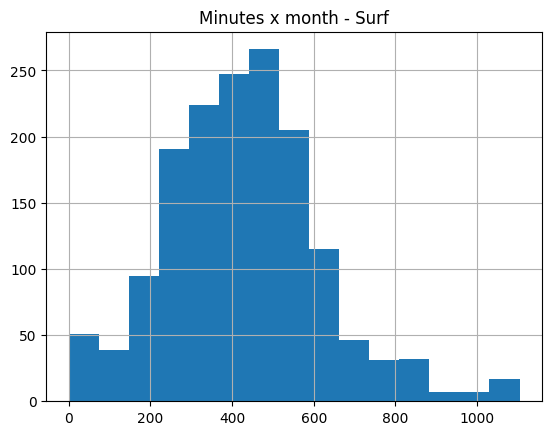

In [63]:
#trazaremos un histograma minutos por mes del plan surf
surf_filtered['mins_x_month'].hist(bins=15)
#titula el histograma: Minutes por month - Surf
plt.title('Minutes x month - Surf')
plt.show()

Podemos ver que la mayoría de los usuarios del plan de surf llaman entre 220 y 590 con un pico cerca de 450. Se observa una disminución general a cada lado del intervalo. Como la media es mayor que la mediana, podemos observar que el histograma tiene un sesgo positivo (o un sesgo hacia la derecha)

Análisis del volumen de datos
---
Hagamos lo mismo con la cantidad de datos utilizados, es decir, la columna "gb_x_month". El mismo ejercicio; encontramos la varianza

In [64]:
np.var(surf_filtered['gb_x_month'])

158.8524469948168

la media y la desviación estándar usando describe()

In [65]:
surf_filtered['gb_x_month'].describe()

count    1573.000000
mean       40.236544
std        12.607676
min         0.000000
25%        34.428571
50%        40.875000
75%        48.500000
max        83.500000
Name: gb_x_month, dtype: float64

trazaremos un histograma.

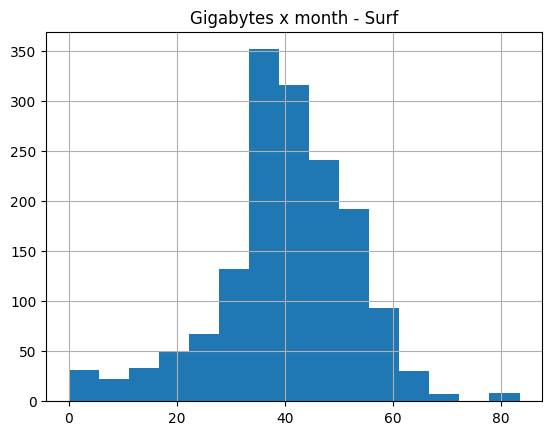

In [66]:
surf_filtered['gb_x_month'].hist(bins=15)
plt.title('Gigabytes x month - Surf')
plt.show()

Observamos un pico cercano a los 35 GB mensuales, con un uso típico que oscila entre los 30 GB y los 50 GB. Podemos observar un valor atípico en el histograma, lo que nos permite saber que 2 o 3 personas utilizan alrededor de 80 GB mensuales. No hay grandes diferencias entre la media y la mediana, por lo que parece que el histograma no está sesgado. Sin embargo, si eliminamos los valores atípicos (es decir, en torno a 80 GB), observaremos una inclinación más negativa.

Análisis de los mensajes por mes.
---
utilizando la columna "messages_x_month", podemos hallar la varianza

In [67]:
np.var(surf_filtered['messages_x_month'])

941.0966861859602

Media y desviación estandar

In [68]:
surf_filtered['messages_x_month'].describe()

count    1573.000000
mean       31.287455
std        30.687055
min         0.000000
25%         3.750000
50%        26.500000
75%        46.166667
max       159.000000
Name: messages_x_month, dtype: float64

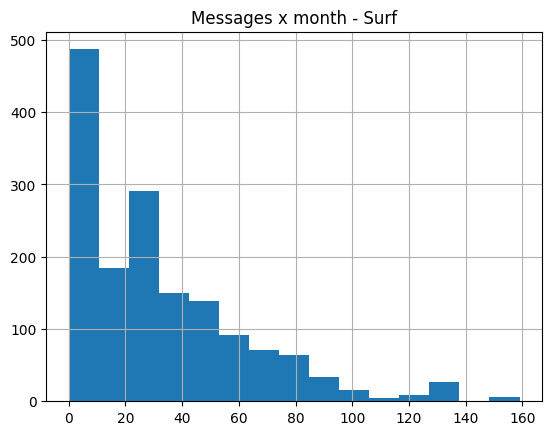

In [69]:
surf_filtered['messages_x_month'].hist(bins=15)
plt.title('Messages x month - Surf')
plt.show()

Observamos un descenso constante, con un pico que oscila entre 0 y unos 10 mensajes en un mes. Así pues, cada vez más personas envían menos mensajes.

Análisis del comportamiento de los usuarios "ultimate
---

In [70]:
ultimate_filtered = new_df.query('plan == "ultimate"')
ultimate_filtered.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 720 entries, 0 to 2269
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   user_id            720 non-null    int64   
 1   month              720 non-null    object  
 2   gb_used            720 non-null    float64 
 3   sms                720 non-null    float64 
 4   duration           720 non-null    float64 
 5   call_count         720 non-null    float64 
 6   plan               720 non-null    category
 7   city               720 non-null    object  
 8   calls_x_month      720 non-null    float64 
 9   mins_x_month       720 non-null    float64 
 10  messages_x_month   720 non-null    float64 
 11  gb_x_month         720 non-null    float64 
 12  basic_salary       720 non-null    int32   
 13  call_cost_overrun  720 non-null    int32   
 14  sms_cost_overrun   720 non-null    int32   
 15  data_cost_overrun  720 non-null    int32   
 16  total_p

Análisis de minutos por mes
---

utilizaremos la columna "messages_x_month", podemos hallar la varianza

In [71]:
np.var(ultimate_filtered['mins_x_month'])

39049.054751763535

Media y desviación estandar usando describe():

In [72]:
ultimate_filtered['mins_x_month'].describe()

count     720.000000
mean      431.743287
std       197.745708
min         0.000000
25%       299.000000
50%       424.950000
75%       527.500000
max      1054.571429
Name: mins_x_month, dtype: float64

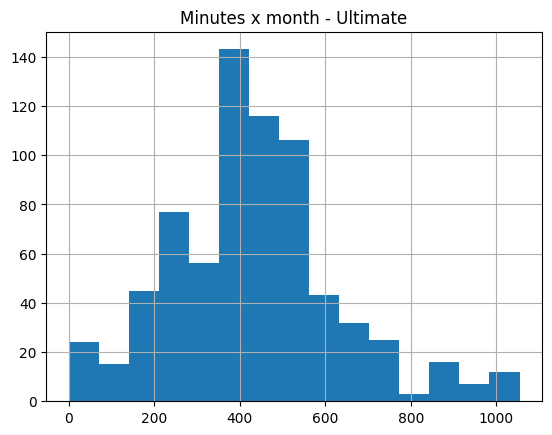

In [73]:
ultimate_filtered['mins_x_month'].hist(bins=15)
plt.title('Minutes x month - Ultimate')
plt.show()

La mayoría de los usuarios pasan entre 220 y cerca de los 550 minutos al mes. A partir del histograma, podemos observar que más de 750 es territorio de valores atípicos y su territorio de valores atípicos está más poblado que el de los usuarios de surf. Si eliminamos los valores atípicos, observamos un sesgo más negativo.

Análisis del volumen de datos
---

utilizaremos la columna "gb_x_month", podemos hallar la varianza

In [74]:
np.var(ultimate_filtered['gb_x_month'])

117.7040514520202

la media y la desviación estandar utilizando describe():

In [75]:
ultimate_filtered['gb_x_month'].describe()

count    720.000000
mean      41.118056
std       10.856692
min        2.000000
25%       36.777778
50%       41.233333
75%       47.333333
max       69.000000
Name: gb_x_month, dtype: float64

trazaremos un histograma

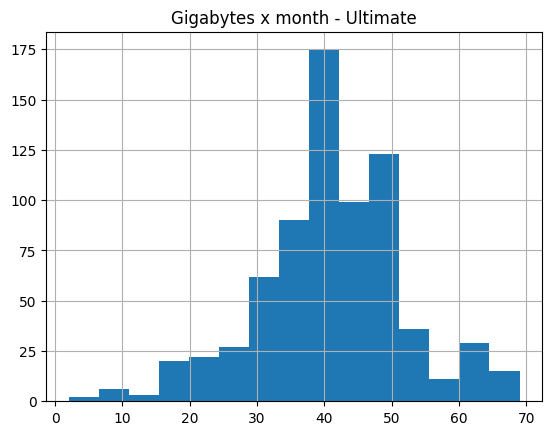

In [76]:
ultimate_filtered['gb_x_month'].hist(bins=15)
plt.title('Gigabytes x month - Ultimate')
plt.show()

Observamos un pico en torno a los 40 GB (más alto que el surf), y la cantidad típica oscila entre unos 30 y unos 50. Se observa un sesgo negativo en el gráfico

Análisis de mensajes por mes
---

utilizaremos la columna "messages_x_month", encontrar la varianza

In [77]:
np.var(ultimate_filtered['messages_x_month'])

1001.3589927691667

La media y la desviación estandar mediante describe()

In [78]:
ultimate_filtered['messages_x_month'].describe()

count    720.000000
mean      37.581651
std       31.666255
min        0.000000
25%        8.888889
50%       32.272727
75%       60.250000
max      148.000000
Name: messages_x_month, dtype: float64

trazaremos un histograma

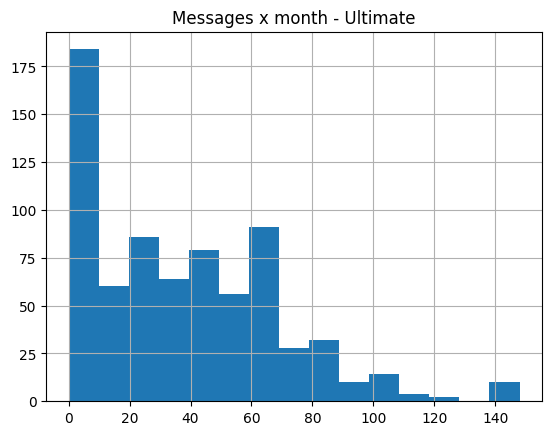

In [79]:
ultimate_filtered['messages_x_month'].hist(bins=15)
plt.title('Messages x month - Ultimate')
plt.show()

se observa una disminución constante, con un pico entre 0 y 10 mensajes. Se trata de un histograma más ruidoso que el de surf y se observa un valor atípico en torno a los 140 mensajes.

Conclusión
Hemos analizado el comportamiento de los usuarios de ambos planes. Para surf, podemos ver que la mayoría de los usuarios del plan surf llaman entre 220 y 590 minutos, con un uso típico de datos que oscila entre unos 30GB y unos 50GB, la mayoría de ellos enviando de 0 a unos 10 mensajes en un mes. Para ultimate, la mayoría de los usuarios gastan entre 220 y unos 550 minutos al mes, con un uso típico de datos que oscila entre unos 30 y unos 50 GB, la mayoría de ellos enviando de 0 a unos 10 mensajes en un mes.

---

Prueba de hipótesis
---

Prueba de hipótesis: "El beneficio medio de los usuarios de los planes de llamadas Ultimate y Surf difiere"
- En primer lugar, debemos especificar que nuestra hipótesis nula es: "El beneficio medio de los usuarios de los planes de llamadas Ultimate y Surf es diferente". Por lo tanto, nuestra hipótesis alternativa será la contraria a la hipótesis nula.
- Utilizaremos el método "st.ttest_ind()", que se utiliza como prueba t para la igualdad de medias o promedios entre 2 poblaciones estadísticas. La función devuelve un valor p que compararemos con un valor que fijaremos nosotros mismos conocido como significación estadística (lo llamaremos alpha y lo fijaremos en el 5%). 
- si nuestro valor p es inferior a nuestro alpha, eso nos indica que no es probable que los promedios (medias) sean iguales, lo que en este caso nos dará motivos para NO rechazar la hipótesis. Si resulta ser mayor que nuestro alfa, eso nos dice que es probable que las medias sean iguales, lo que en este caso nos da motivos para rechazar la hipótesis nula. En primer lugar, debemos comprobar si las varianzas de ambos conjuntos de datos son diferentes o iguales (al menos aproximadamente iguales). Examinaremos la columna "total_pay" de las tablas "surf_filtered" y "ultimate_filtered".

Obtengamos la varianza de ultimate_filtered['total_pay'].

In [80]:
np.var(ultimate_filtered['total_pay'])

12074.818950617282

Ahora para surf_filtered['total_pay']

In [81]:
np.var(surf_filtered['total_pay'])

26615.02124010186

In [82]:
#nuestra significación estadística en el 5%
alpha = 0.05 

#realizando la prueba en las columnas total_pay de ambos cortes especificando que sus varianzas no son iguales
results = st.ttest_ind(ultimate_filtered['total_pay'], surf_filtered['total_pay'], equal_var=False)
print('p-value:', results.pvalue)

#declaración condicional
if results.pvalue < alpha:
#si el valor p es menor que alpha significa que las medias no son iguales
    print('No podemos ignorar la hipótesis nula')
else:
#si no
    print('Rechazamos la hipótesis nula')

p-value: 0.031903140354255316
No podemos ignorar la hipótesis nula


El valor p es menor que alfa, lo que significa que no es probable que las medias de ambos dataframe sean iguales. Así que no tenemos motivos para rechazar la hipótesis nula.

Prueba de hipótesis 2: El ingreso promedio de los usuarios en el área de estados Nueva York-Nueva Jersey es diferente al de los usuarios de otras regiones.
---

Primero tendremos que crear un filtro en el que la columna 'región' = "ny-nj" y otro en el que la 'región' = "other"

In [83]:
nynj_filtered = new_df.query('region == "ny-nj"')
nynj_filtered.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 377 entries, 56 to 2280
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   user_id            377 non-null    int64   
 1   month              377 non-null    object  
 2   gb_used            377 non-null    float64 
 3   sms                377 non-null    float64 
 4   duration           377 non-null    float64 
 5   call_count         377 non-null    float64 
 6   plan               377 non-null    category
 7   city               377 non-null    object  
 8   calls_x_month      377 non-null    float64 
 9   mins_x_month       377 non-null    float64 
 10  messages_x_month   377 non-null    float64 
 11  gb_x_month         377 non-null    float64 
 12  basic_salary       377 non-null    int32   
 13  call_cost_overrun  377 non-null    int32   
 14  sms_cost_overrun   377 non-null    int32   
 15  data_cost_overrun  377 non-null    int32   
 16  total_

In [84]:
other_region_filtered = new_df.query('region == "other"')
other_region_filtered.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1916 entries, 0 to 2292
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   user_id            1916 non-null   int64   
 1   month              1916 non-null   object  
 2   gb_used            1916 non-null   float64 
 3   sms                1916 non-null   float64 
 4   duration           1916 non-null   float64 
 5   call_count         1916 non-null   float64 
 6   plan               1916 non-null   category
 7   city               1916 non-null   object  
 8   calls_x_month      1916 non-null   float64 
 9   mins_x_month       1916 non-null   float64 
 10  messages_x_month   1916 non-null   float64 
 11  gb_x_month         1916 non-null   float64 
 12  basic_salary       1916 non-null   int32   
 13  call_cost_overrun  1916 non-null   int32   
 14  sms_cost_overrun   1916 non-null   int32   
 15  data_cost_overrun  1916 non-null   int32   
 16  total_

nuestra hipótesis nula es: "El ingreso promedio de los usuarios de la zona NY-NJ es diferente del de los usuarios de otras regiones". Por lo tanto, nuestra hipótesis alternativa es: "El ingreso promedio de los usuarios de la zona NY-NJ es el mismo que el de los usuarios de otras regiones". Será la misma prueba; si el valor p es inferior a nuestro alfa de 0.05, significa que no es probable que los promedios (medias) de ambos conjuntos sean iguales, lo que en este caso nos da motivos para NO rechazar la hipótesis nula, y viceversa. Hallemos ambas varianzas

In [85]:
np.var(nynj_filtered['total_pay'])

20150.25443083396

In [86]:
np.var(other_region_filtered['total_pay'])

22457.407093762668

In [87]:
alpha = 0.05
results = st.ttest_ind(nynj_filtered['total_pay'], other_region_filtered['total_pay'], equal_var=False)
print('p-value:', results.pvalue)
if results.pvalue < alpha:
    print('No podemos ignorar la hipótesis nula')
else:
    print('Rechazamos la hipótesis nula')

p-value: 0.46390206081741814
Rechazamos la hipótesis nula


Conclusión general
---
- Hemos hecho diferentes analisis: los minutos al mes, los mensajes al mes y el volumen de datos al mes de los usuarios de los planes Surf y Ultimate, y tienen un comportamiento similar. 
- Realizamos pruebas t y no encontramos motivos para rechazar la hipótesis de que el beneficio promedio de los usuarios de los planes de llamadas Ultimate y Surf difiere, pero sí pudimos rechazar la que estipulaba que el beneficio promedio de los usuarios de la zona NY-NJ es diferente al de los usuarios de otras regiones